## Importing Modules


In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split


df = pd.read_csv('data/developer_dataset.csv')
df.head()

/var/folders/yh/7k5bf4ln10s4_h2kj1zxwpnh0000gn/T/ipykernel_66075/666788893.py:10: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/developer_dataset.csv')


,RespondentID,Year,Country,Employment,UndergradMajor,DevType,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,...,PlatformDesireNextYear,Hobbyist,OrgSize,YearsCodePro,JobSeek,ConvertedComp,WorkWeekHrs,NEWJobHunt,NEWJobHuntResearch,NEWLearn
0,1,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Engineering manager;Full-stack developer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,141000.0,NaN,NaN,NaN,NaN
1,1,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...","Developer, full-stack",C;C++;C#;Python;SQL,C;C#;JavaScript;SQL,MySQL;SQLite,MySQL;SQLite,...,Linux;Windows,No,100 to 499 employees,1.0,I am not interested in new job opportunities,61000.0,80.0,NaN,NaN,NaN
2,1,2020,United States,Employed full-time,"Computer science, computer engineering, or sof...",NaN,HTML/CSS;Ruby;SQL,Java;Ruby;Scala,MySQL;PostgreSQL;Redis;SQLite,MySQL;PostgreSQL,...,Docker;Google Cloud Platform;Heroku;Linux;Windows,Yes,NaN,8.0,NaN,NaN,NaN,NaN,NaN,Once a year
3,2,2018,United States,Employed full-time,"Computer science, computer engineering, or sof...",Full-stack developer,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell,"SQL Server;Microsoft Azure (Tables, CosmosDB, ...","SQL Server;Microsoft Azure (Tables, CosmosDB, ...",...,Azure,NaN,NaN,4.0,NaN,48000.0,NaN,NaN,NaN,NaN
4,2,2019,United States,Employed full-time,"Computer science, computer engineering, or sof...",Data or business analyst;Database administrato...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Rust...,Couchbase;DynamoDB;Firebase;MySQL,Firebase;MySQL;Redis,...,Android;AWS;Docker;IBM Cloud or Watson;Linux;S...,Yes,10 to 19 employees,8.0,I am not interested in new job opportunities,90000.0,40.0,NaN,NaN,NaN


# EDA

In [45]:
df.columns

Index(['RespondentID', 'Year', 'Country', 'Employment', 'UndergradMajor',
       'DevType', 'LanguageWorkedWith', 'LanguageDesireNextYear',
       'DatabaseWorkedWith', 'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'Hobbyist', 'OrgSize', 'YearsCodePro',
       'JobSeek', 'ConvertedComp', 'WorkWeekHrs', 'NEWJobHunt',
       'NEWJobHuntResearch', 'NEWLearn'],
      dtype='object')

In [46]:
df.count()

RespondentID              111209
Year                      111209
Country                   111209
Employment                109425
UndergradMajor             98453
DevType                   100433
LanguageWorkedWith        102018
LanguageDesireNextYear     96044
DatabaseWorkedWith         85859
DatabaseDesireNextYear     74234
PlatformWorkedWith         91609
PlatformDesireNextYear     85376
Hobbyist                   68352
OrgSize                    54804
YearsCodePro               94793
JobSeek                    60556
ConvertedComp              91333
WorkWeekHrs                51089
NEWJobHunt                 19127
NEWJobHuntResearch         18683
NEWLearn                   24226
dtype: int64

In [47]:
df.describe()

,RespondentID,Year,YearsCodePro,ConvertedComp,WorkWeekHrs
count,111209.000000,111209.000000,94793.000000,9.133300e+04,51089.000000
mean,19262.039709,2018.854832,9.547045,1.251777e+05,41.051670
std,11767.011322,0.777503,7.548931,2.461218e+05,13.833929
min,1.000000,2018.000000,0.000000,0.000000e+00,1.000000
25%,9268.000000,2018.000000,4.000000,4.600000e+04,40.000000
50%,18535.000000,2019.000000,8.000000,7.900000e+04,40.000000
75%,28347.000000,2019.000000,14.000000,1.200000e+05,42.000000
max,42857.000000,2020.000000,50.000000,2.000000e+06,475.000000


In [48]:
maxRows = df['RespondentID'].count()

print('% Missing Data:')
print((1 - df.count() / maxRows) * 100)

% Missing Data:
RespondentID               0.000000
Year                       0.000000
Country                    0.000000
Employment                 1.604187
UndergradMajor            11.470295
DevType                    9.689863
LanguageWorkedWith         8.264619
LanguageDesireNextYear    13.636486
DatabaseWorkedWith        22.794918
DatabaseDesireNextYear    33.248208
PlatformWorkedWith        17.624473
PlatformDesireNextYear    23.229235
Hobbyist                  38.537349
OrgSize                   50.719816
YearsCodePro              14.761395
JobSeek                   45.547573
ConvertedComp             17.872654
WorkWeekHrs               54.060373
NEWJobHunt                82.800852
NEWJobHuntResearch        83.200101
NEWLearn                  78.215792
dtype: float64


## Dropping Data With High Percentage Of Missing Values 

In [49]:
df.drop(['NEWJobHunt','NEWJobHuntResearch','NEWLearn'],
    axis=1,
    inplace=True)

## Analyzing developers by country

In [50]:
df[['RespondentID','Country']].groupby('Country').count()

missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()
missingData

,Country,Employment,DevType
0,Canada,148,944
1,China,139,491
2,France,104,848
3,Germany,386,1691
4,Japan,13,109
5,Mexico,25,207
6,Spain,74,434
7,United Kingdom,196,1472
8,United States,699,4580


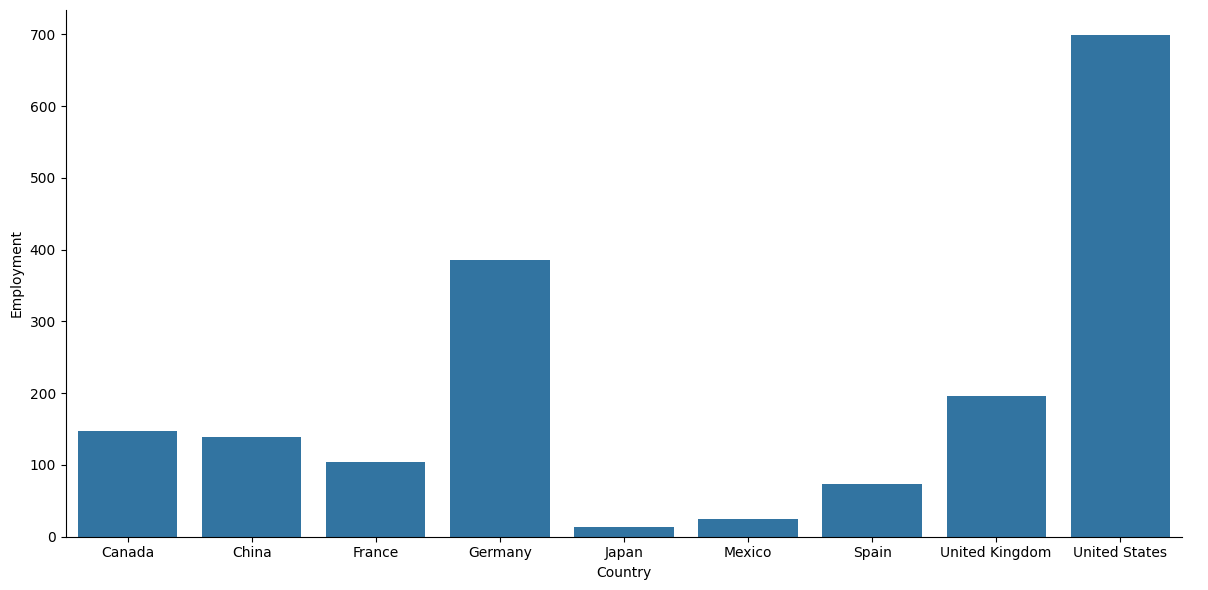

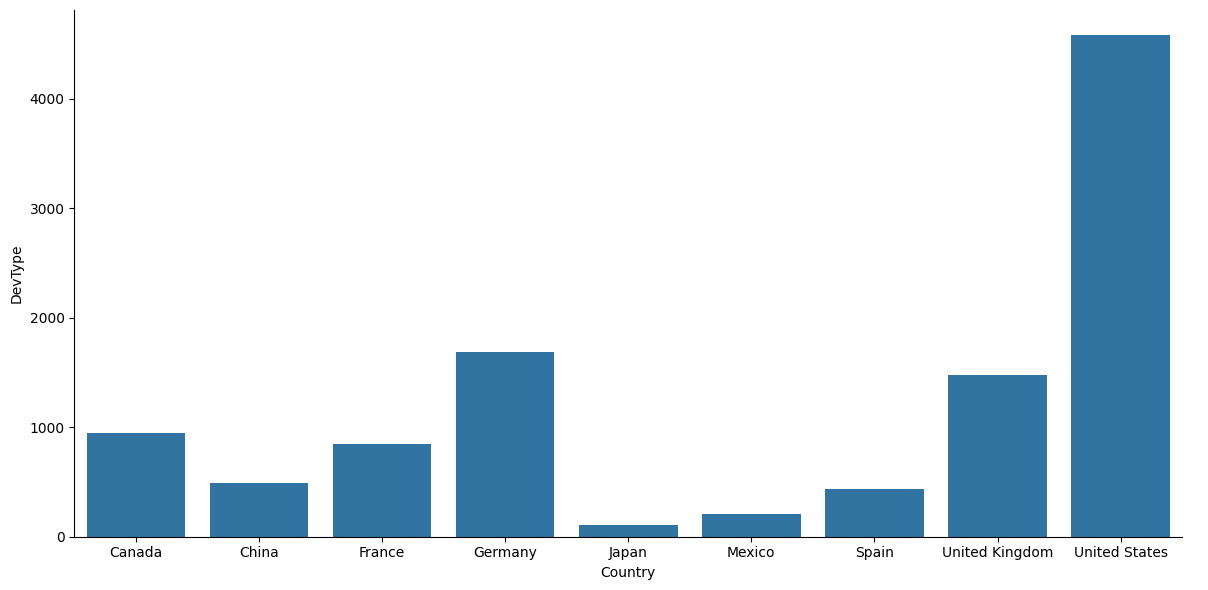

In [51]:
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2)
B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2)

## Data missing Completely at random (pairwise)

In [52]:
df.dropna(subset = ['Employment','DevType'],
    inplace = True,
    how = 'any')

## Analyzin the distribution of employment and developer types by country

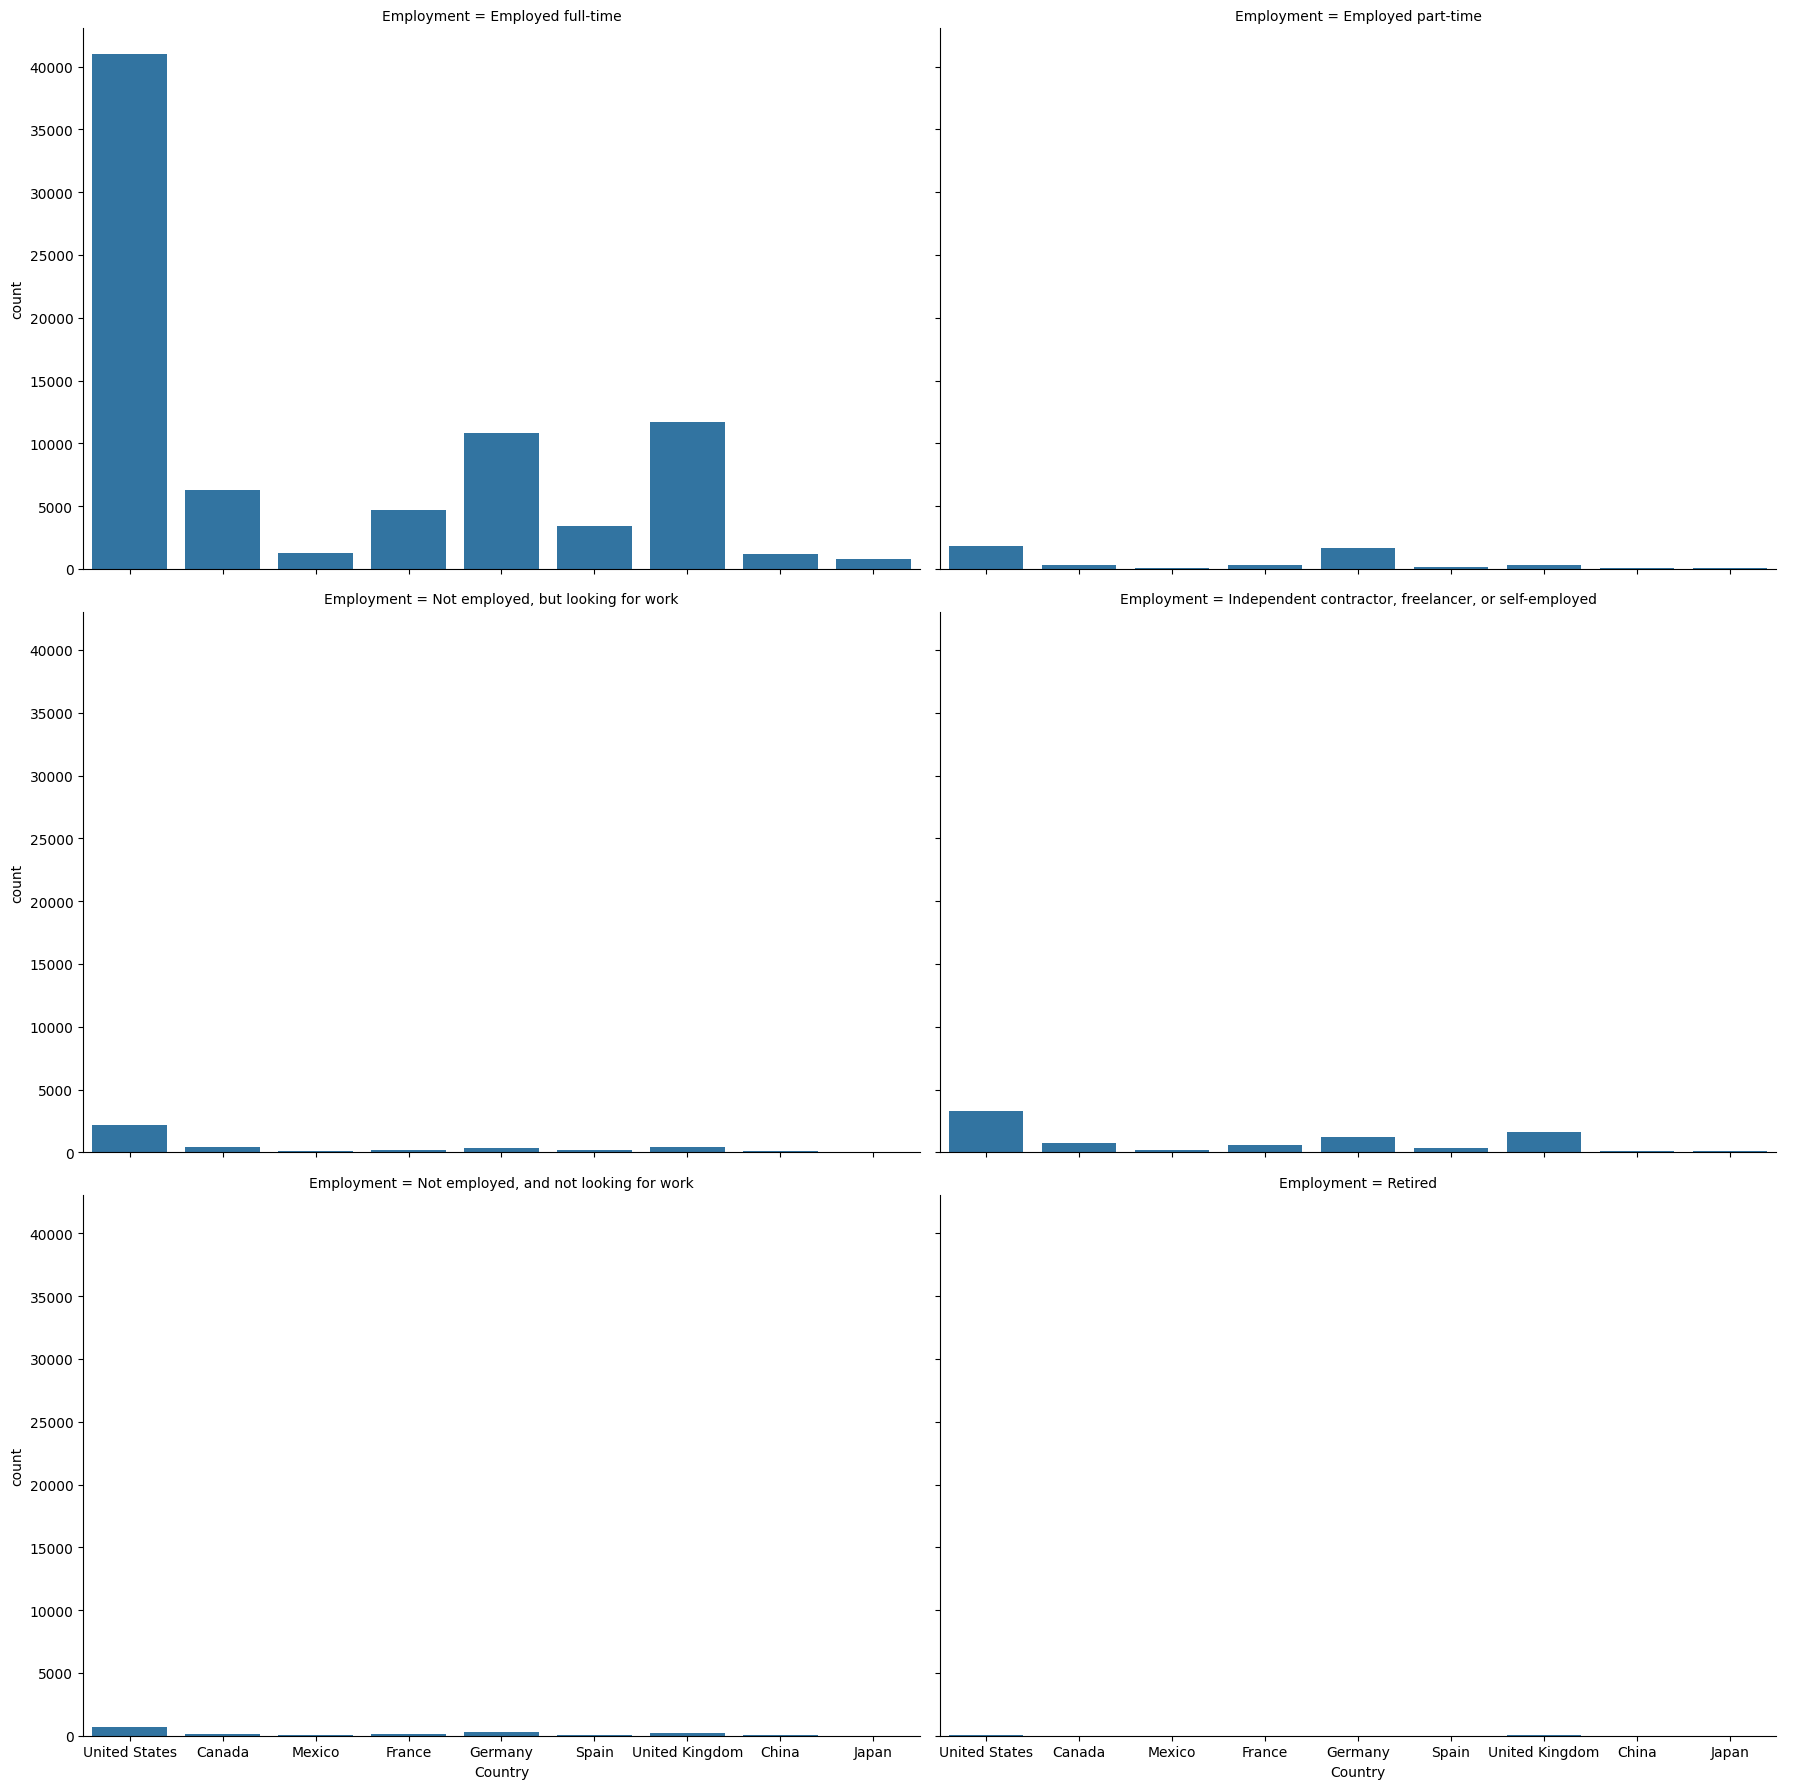

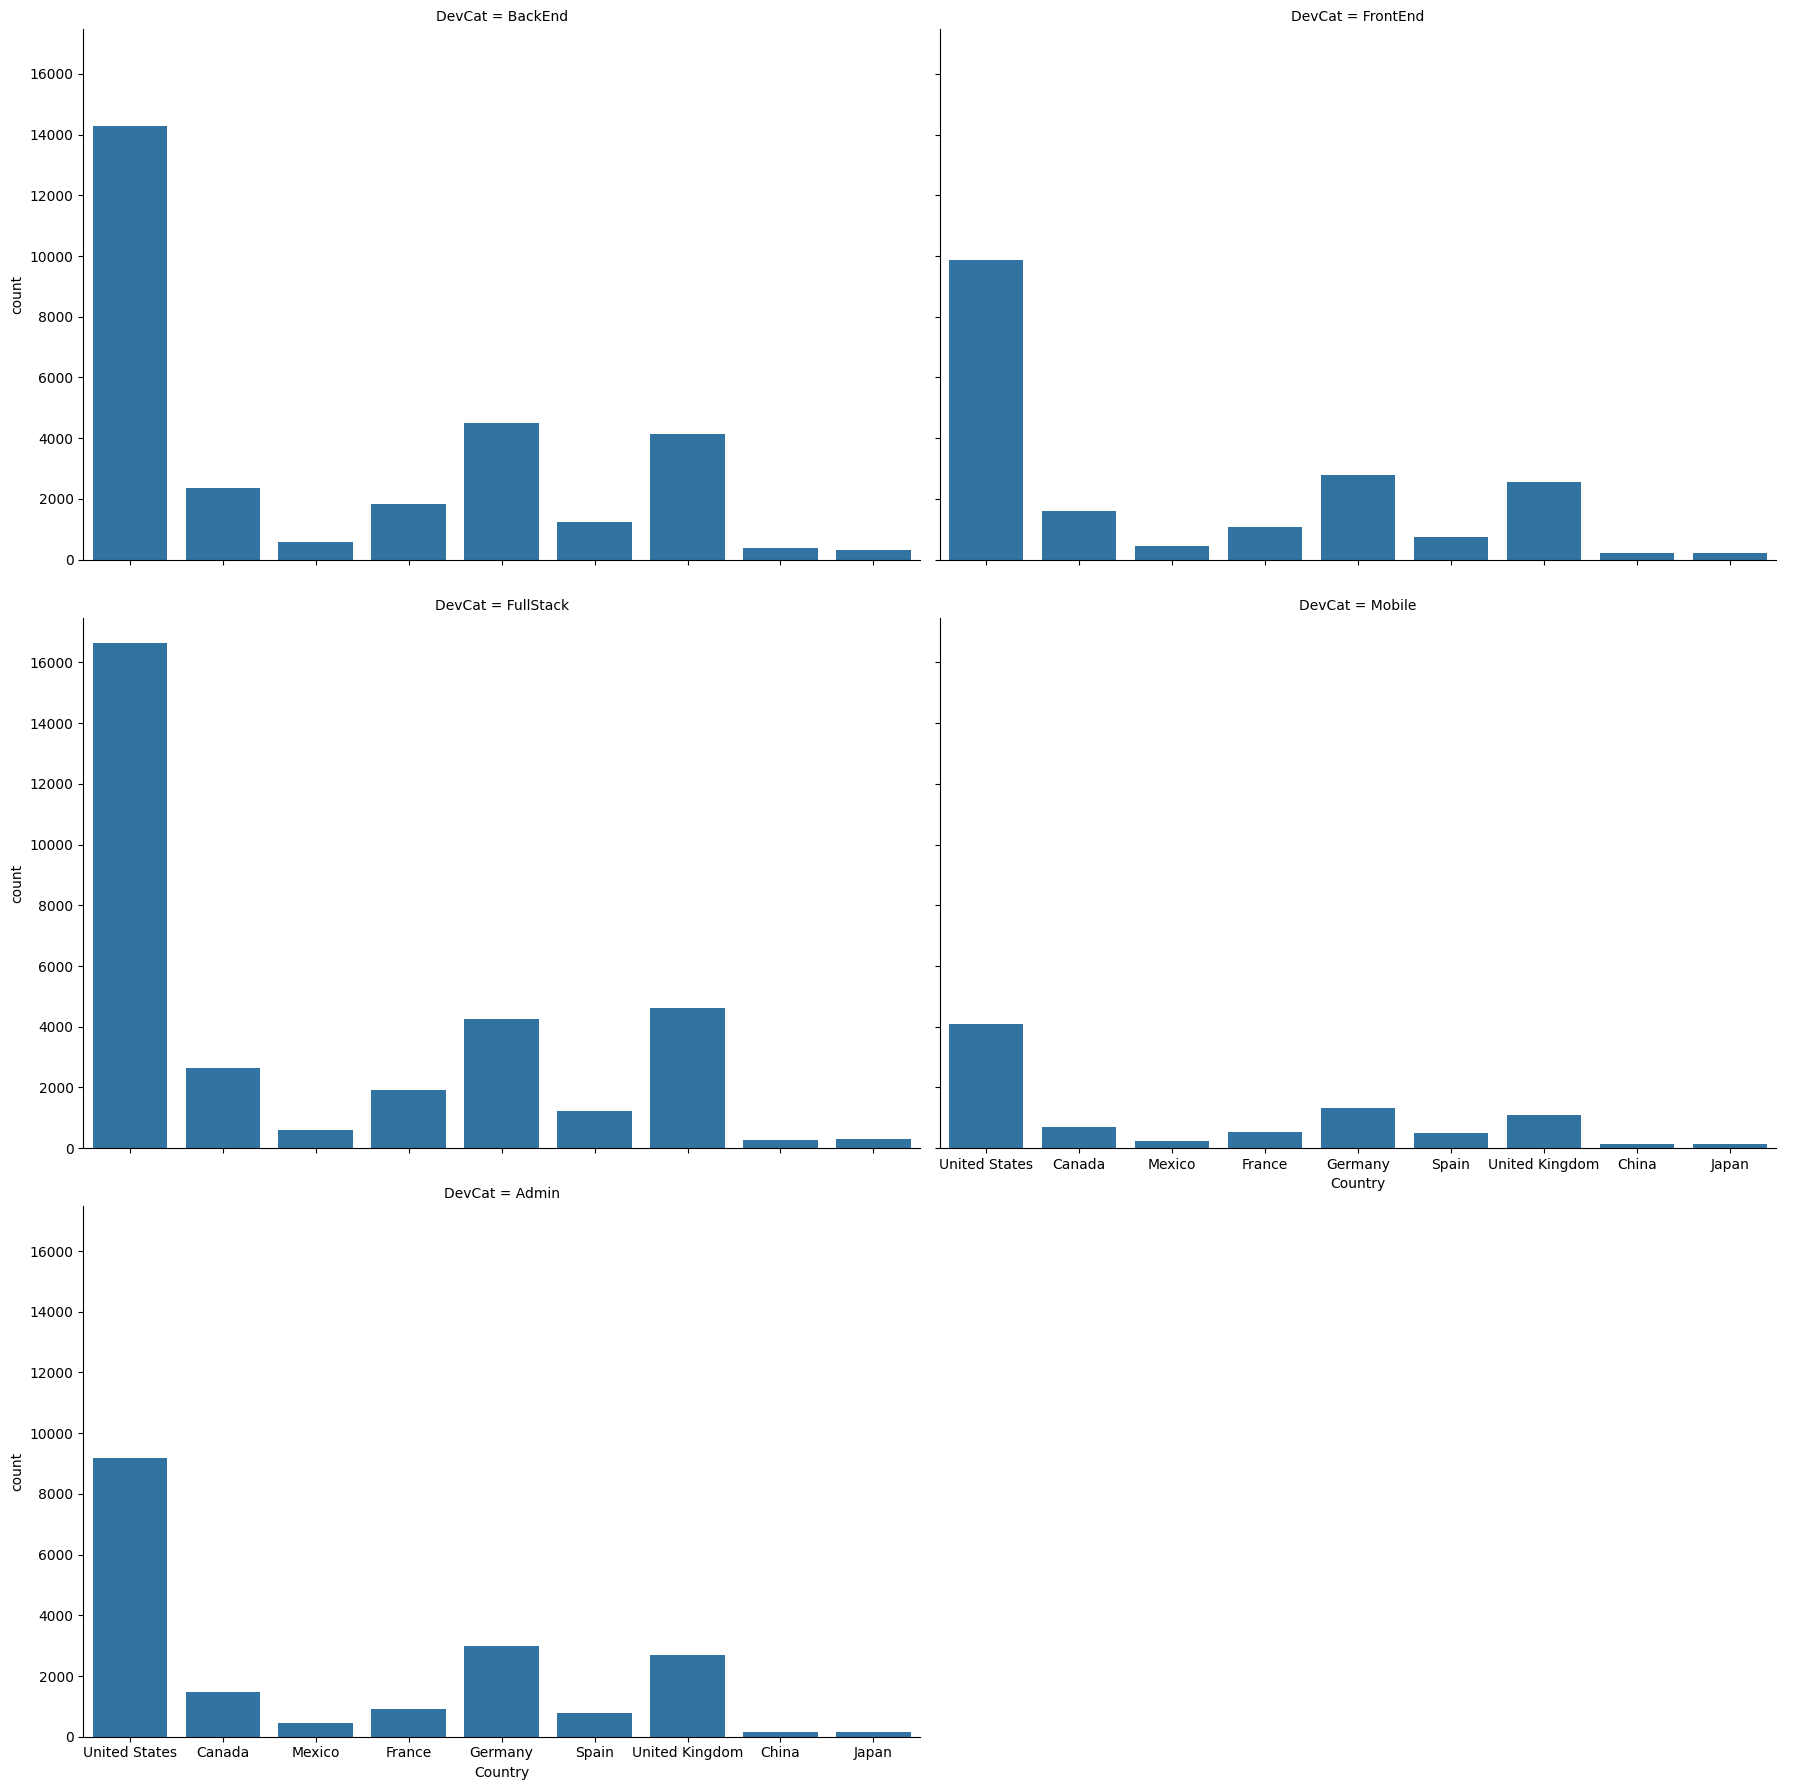

In [53]:
empfig = sns.catplot(x="Country", col="Employment",
                data=df, kind="count",
                height=6, aspect=1.5, col_wrap=2 )

devdf = df[['Country','DevType']].copy()
devdf.loc[devdf['DevType'].str.contains('back-end'), 'BackEnd'] = True
devdf.loc[devdf['DevType'].str.contains('front-end'), 'FrontEnd'] = True
devdf.loc[devdf['DevType'].str.contains('full-stack'), 'FullStack'] = True
devdf.loc[devdf['DevType'].str.contains('mobile'), 'Mobile'] = True
devdf.loc[devdf['DevType'].str.contains('administrator'), 'Admin'] = True

devdf = devdf.melt(id_vars=['Country'], 
    value_vars=['BackEnd','FrontEnd','FullStack','Mobile','Admin'], 
    var_name='DevCat',
    value_name='DevFlag')

devdf.dropna(how='any', inplace=True)

devFig = sns.catplot(x="Country", col="DevCat",
                data=devdf, kind="count",
                height=6, aspect=1.5,col_wrap=2 )

## Investigating developer undergraduate majors

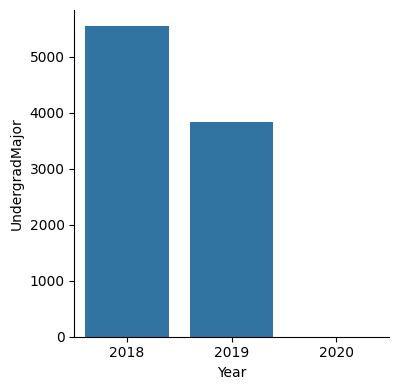

In [54]:
missingUndergrad = df['UndergradMajor'].isnull().groupby(df['Year']).sum().reset_index()

sns.catplot(x="Year", y="UndergradMajor",
                data=missingUndergrad, kind="bar",
                height=4, aspect=1)

In [55]:
df = df.sort_values(['RespondentID','Year'])

df['UndergradMajor'].bfill(axis=0, inplace=True)
df['UndergradMajor']

/var/folders/yh/7k5bf4ln10s4_h2kj1zxwpnh0000gn/T/ipykernel_66075/4115347726.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['UndergradMajor'].bfill(axis=0, inplace=True)


0         Computer science, computer engineering, or sof...
1         Computer science, computer engineering, or sof...
3         Computer science, computer engineering, or sof...
4         Computer science, computer engineering, or sof...
5         Computer science, computer engineering, or sof...
                                ...                        
111187    Computer science, computer engineering, or sof...
111188    Computer science, computer engineering, or sof...
111190    A humanities discipline (ex. literature, histo...
111191                                                  NaN
111198                                                  NaN
Name: UndergradMajor, Length: 99975, dtype: object

/var/folders/yh/7k5bf4ln10s4_h2kj1zxwpnh0000gn/T/ipykernel_66075/2077877840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.dropna(how='any', inplace=True)
/var/folders/yh/7k5bf4ln10s4_h2kj1zxwpnh0000gn/T/ipykernel_66075/2077877840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
/var/folders/yh/7k5bf4ln10s4_h2kj1zxwpnh0000gn/T/ipykernel_66075/2077877840.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

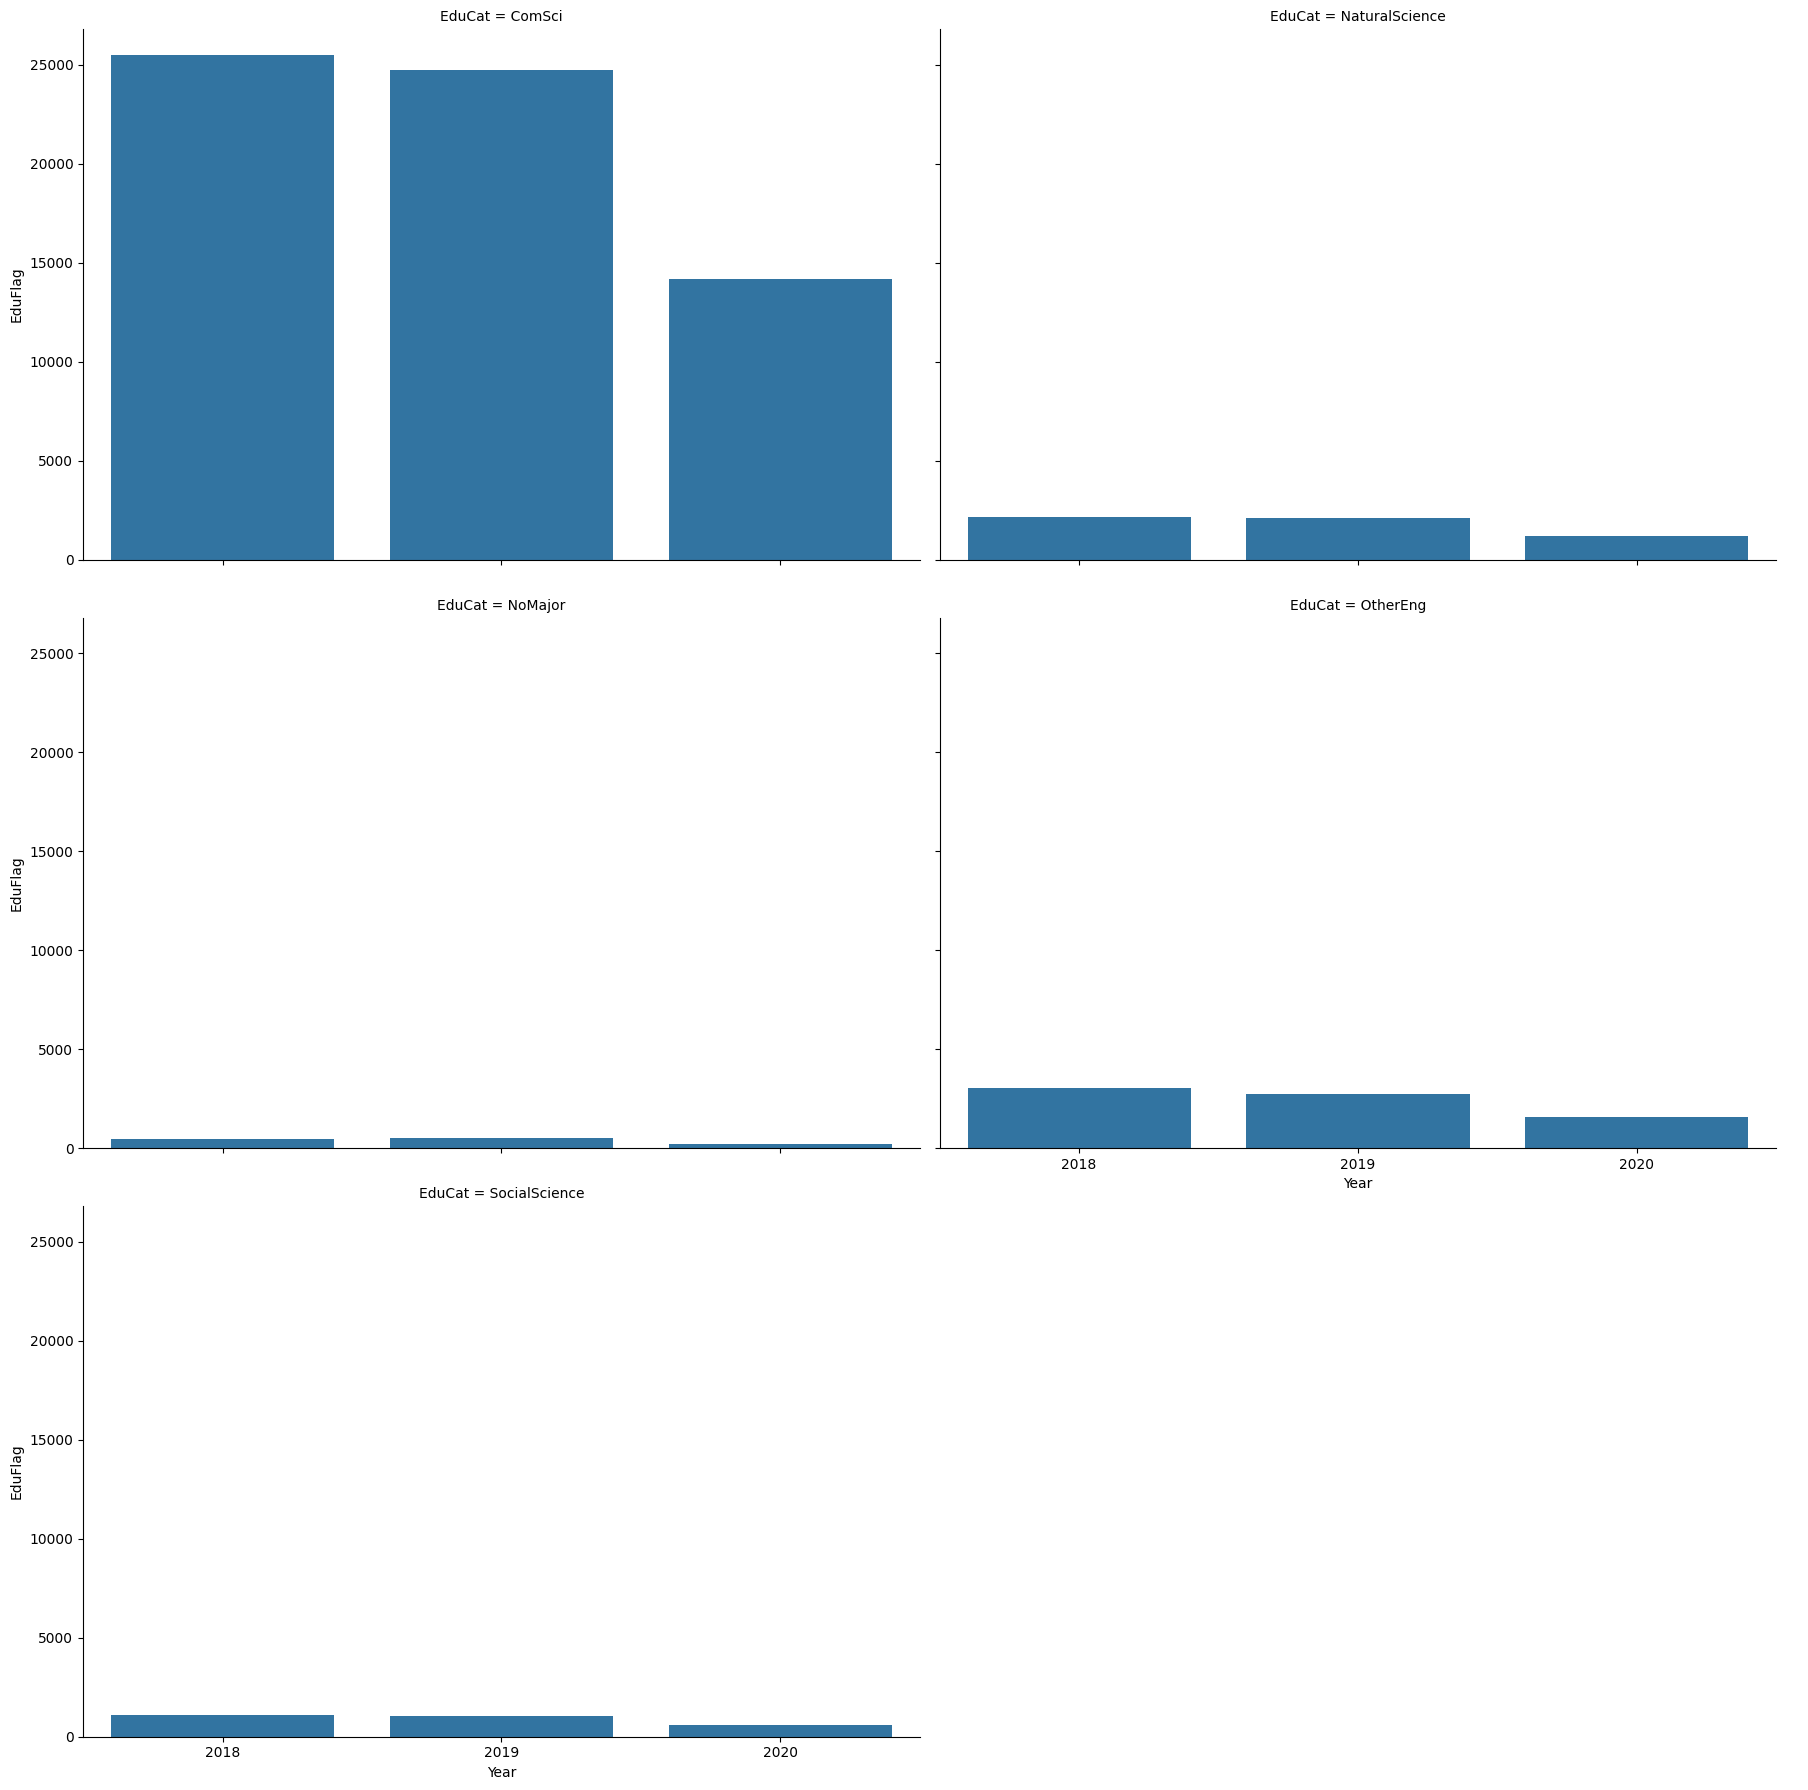

In [56]:
majors = ['social science','natural science','computer science','development','another engineering','never declared']

edudf = df[['Year','UndergradMajor']]
edudf.dropna(how='any', inplace=True)
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)social science'), 'SocialScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)natural science'), 'NaturalScience'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)computer science'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)development'), 'ComSci'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)another engineering'), 'OtherEng'] = True
edudf.loc[edudf['UndergradMajor'].str.contains('(?i)never declared'), 'NoMajor'] = True

edudf = edudf.melt(id_vars=['Year'], 
    value_vars=['SocialScience','NaturalScience','ComSci','OtherEng','NoMajor'], 
    var_name='EduCat',
    value_name='EduFlag')

edudf.dropna(how='any', inplace=True)
edudf = edudf.groupby(['Year','EduCat']).count().reset_index()

eduFig = sns.catplot(x="Year", y='EduFlag', col="EduCat",
                data=edudf, kind="bar",
                height=6, aspect=1.5 ,col_wrap=2)


## Examining the relationship between years of experience and compensation

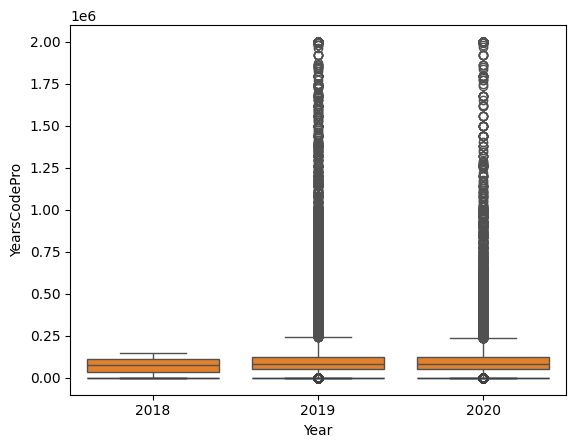

In [57]:
compFields = df[['Year','YearsCodePro','ConvertedComp']]

D = sns.boxplot(x="Year", y="YearsCodePro",
            data=compFields)

E = sns.boxplot(x="Year", y="ConvertedComp",
            data=compFields)

## Multiple Impute To Fill In Missing Values Since Theres A Trend 

In [58]:
imputedf = df[['YearsCodePro','ConvertedComp']]

traindf, testdf = train_test_split(imputedf, train_size=0.1)


imp = IterativeImputer(max_iter=20, random_state=0)

imp.fit(imputedf)

compdf = pd.DataFrame(np.round(imp.transform(imputedf),0), columns=['YearsCodePro','ConvertedComp'])

/var/folders/yh/7k5bf4ln10s4_h2kj1zxwpnh0000gn/T/ipykernel_66075/162640794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)


<Axes: xlabel='CodeYearBins', ylabel='ConvertedComp'>

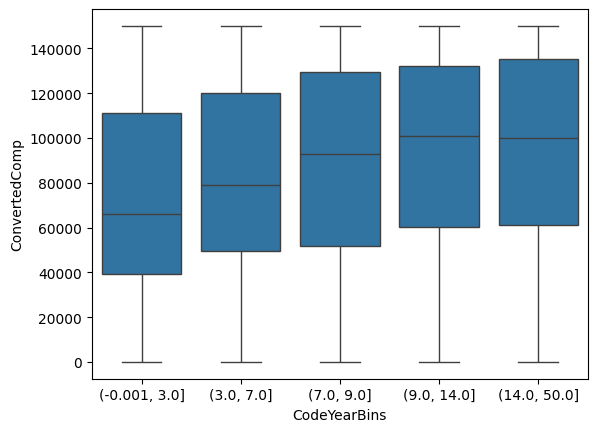

In [59]:
compPlotdf = compdf.loc[compdf['ConvertedComp'] <= 150000]
compPlotdf['CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

sns.boxplot(x="CodeYearBins", y="ConvertedComp",
            data=compPlotdf)

## Summary


This analysis of Stack Overflow survey data reveals key trends in the global developer community. Most developers are employed full-time and specialize in front-end, back-end, or full-stack roles. Computer Science remains the most common educational background, but other majors are also entering the field. There is a clear relationship between years of experience and compensation, with more experienced developers earning higher salaries on average. By carefully handling missing data, the analysis provides reliable insights that can help guide hiring and workforce planning decisions.